# <b><u> Project Title : Netflix Movies and TV Shows Clustering </u></b>

**Index:**
1. Problem statement
2. Importing the libraries and the dataset
3. Understanding data
4. Cleaning data
5. Exploratory data analysis
6. Data preprocessing
7. Clusters impelementation
8. Building content based recommender system
9. Conclusions
10. References

# **1. Problem statement:**

* Netflix is the world's largest online streaming service provider, with over 220 million subscribers as of 2022-Q2. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.
* We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.
* The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

# **2. Importing the libraries and the dataset:**

In [136]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [137]:
# reading data
df = pd.read_csv('/content/Netflix_movies_and_tv_shows_clustering.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# **3. Understanding data:**

In [138]:
# top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [139]:
# dataframe shape
df.shape

(7787, 12)

**The dataset contains 7787 records and 11 attributes.**

In [140]:
# unique values in each column
df.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


## <b> 3.1. Attribute Information </b>
1. **show_id** : Unique ID for every Movie / Tv Show
2. **type** : Identifier - A Movie or TV Show
3. **title** : Title of the Movie / Tv Show
4. **director** : Director of the Movie
5. **cast** : Actors involved in the movie / show
6. **country** : Country where the movie / show was produced
7. **date_added** : Date it was added on Netflix
8. **release_year** : Actual Releaseyear of the movie / show
9. **rating** : TV Rating of the movie / show
10. **duration** : Total Duration - in minutes or number of seasons
11. **listed_in** : Genre
12. **description**: The Summary description

# **4. Cleaning data:**

## **4.1. Checking for duplicate records:**

In [141]:
# Checking for duplicate records
df.duplicated().value_counts()

,count
False,7787


**There are no duplicated records in the dataset.**

## **4.2. Checking for missing values and handling them:**

<Axes: >

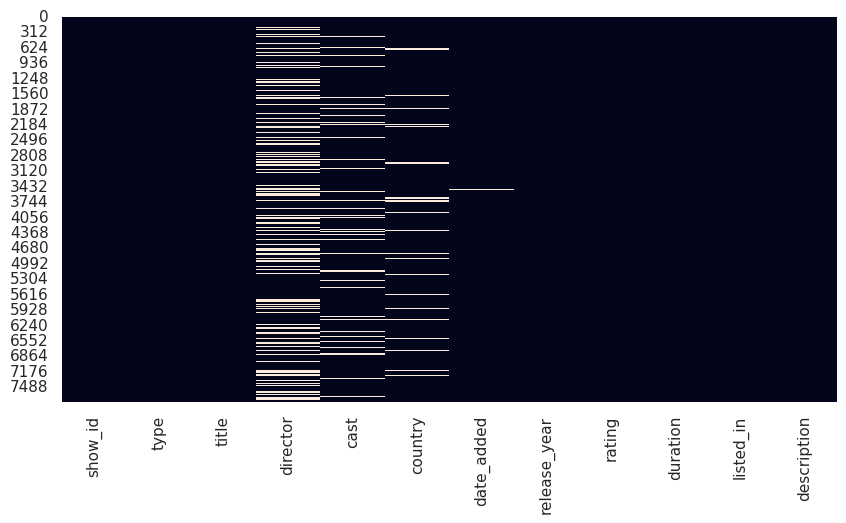

In [142]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)

In [143]:
# Missing values in the dataset
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


**There are many missing values in director, cast, country, date_added, and rating columns.**

In [144]:
# Checking the unique values in each attribute of the dataset
df.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


* The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
* 10 records with missing values in the date_added column can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.

In [145]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [146]:
df.shape

(7777, 12)

We have successfully handled all the missing values in the dataset.

## **4.3. Country, listed_in:**

In [147]:
# Top countries
df.country.value_counts()

,count
country,
United States,2549
India,923
Unknown,506
United Kingdom,396
Japan,225
...,...
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1
"United Kingdom, France, United States, Belgium",1


In [148]:
# Genre of shows
df.listed_in.value_counts()

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
Sports Movies,1
"Crime TV Shows, TV Horror, TV Mysteries",1
"Children & Family Movies, Classic Movies, Dramas",1


* There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
* To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
* Also, let's consider only the primary genre of the respective movie / TV show.

In [149]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [150]:
# contry in which a movie was produced
df.country.value_counts()

,count
country,
United States,2877
India,956
United Kingdom,576
Unknown,506
Canada,259
...,...
Jamaica,1
Cyprus,1
Greece,1


In [151]:
# genre of shows
df.listed_in.value_counts()

,count
listed_in,
Dramas,1384
Comedies,1074
Documentaries,751
Action & Adventure,721
International TV Shows,689
Children & Family Movies,502
Crime TV Shows,369
Kids' TV,357
Stand-Up Comedy,321


## **4.4. Typecasting 'duration' from string to integer**

In [152]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [153]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

,count
duration,
1,1608
2,378
3,183
4,86
5,57
6,30
7,19
8,18
9,8


In [154]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [155]:
# datatype of duration
df.duration.dtype

dtype('int64')

We have successfully converted the datatype of duration column to int.

## **4.5. Typecasting 'date_added' from string to datetime:**

In [156]:
# Typecasting 'date_added' from string to datetime
# Adding format argument and error handling to address inconsistent date formats
df["date_added"] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
# errors='coerce' will replace invalid dates with NaT (Not a Time) which you can handle later if needed.

In [157]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows were added on Netflix between 1st January 2008 and 16th January 2021.

In [158]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

## **4.6. Rating:**

The ratings can be changed to age restrictions that apply on certain movies and TV shows.

[Reference](https://www.primevideo.com/help/ref=atv_hp_nd_cnt?nodeId=GFGQU3WYEG6FSJFJ)

<Axes: xlabel='rating', ylabel='count'>

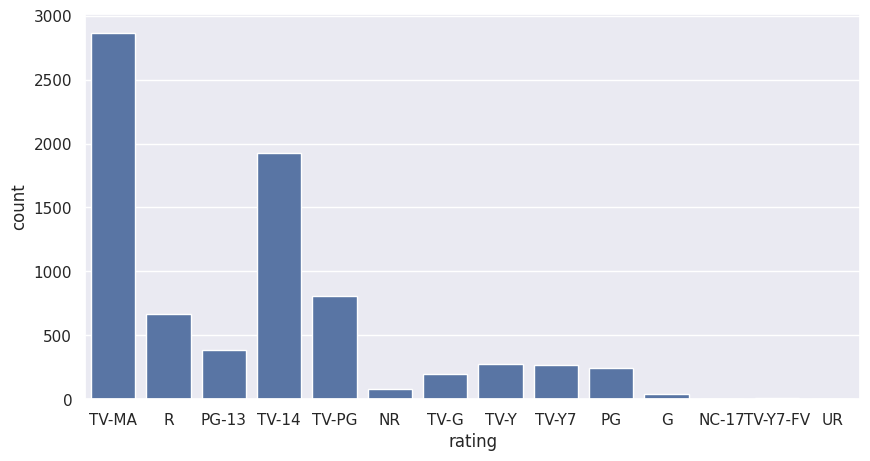

In [159]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

**Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG**

In [160]:
# Age ratings
df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [161]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

<Axes: xlabel='rating', ylabel='count'>

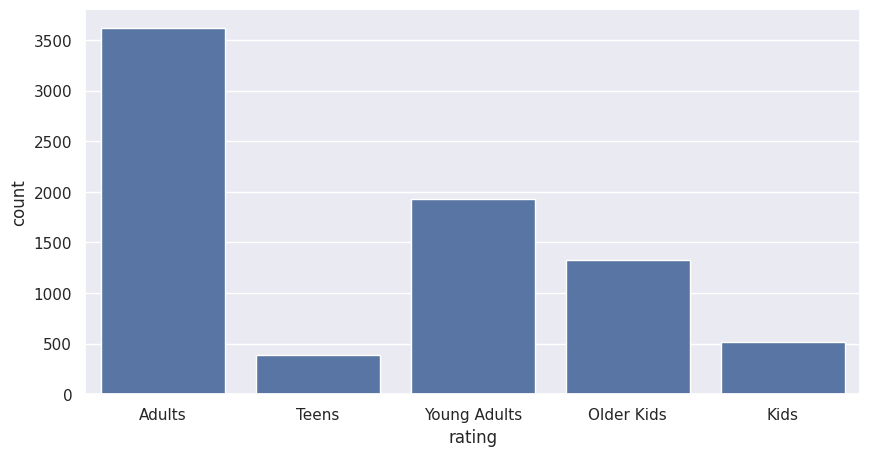

In [162]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

**Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.**

# **5. Exploratory Data Analysis:**

## **5.1. Univatiate Analysis:**

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

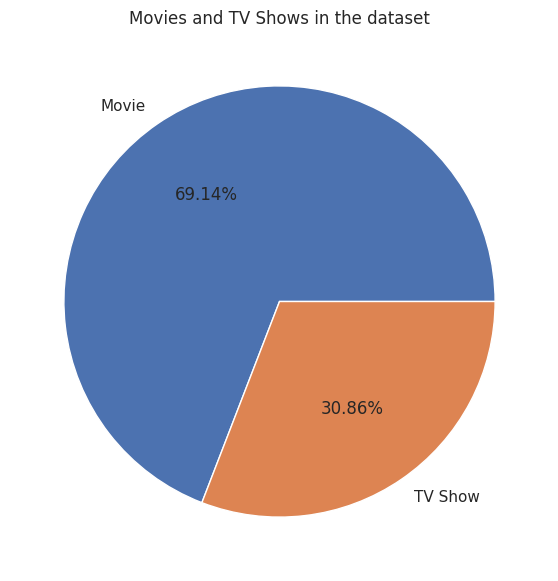

In [163]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

* **There are more movies (69.14%) than TV shows (30.86%)  in the dataset.**

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

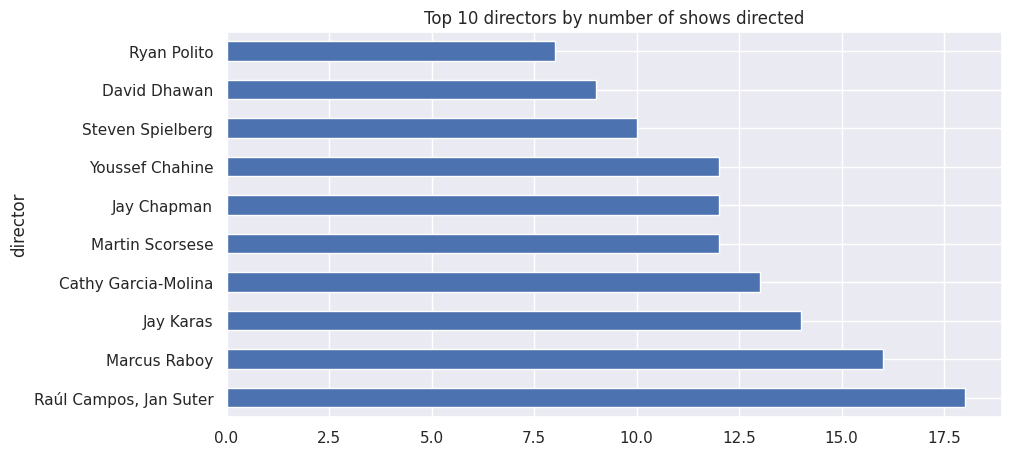

In [164]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

* **Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.**

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

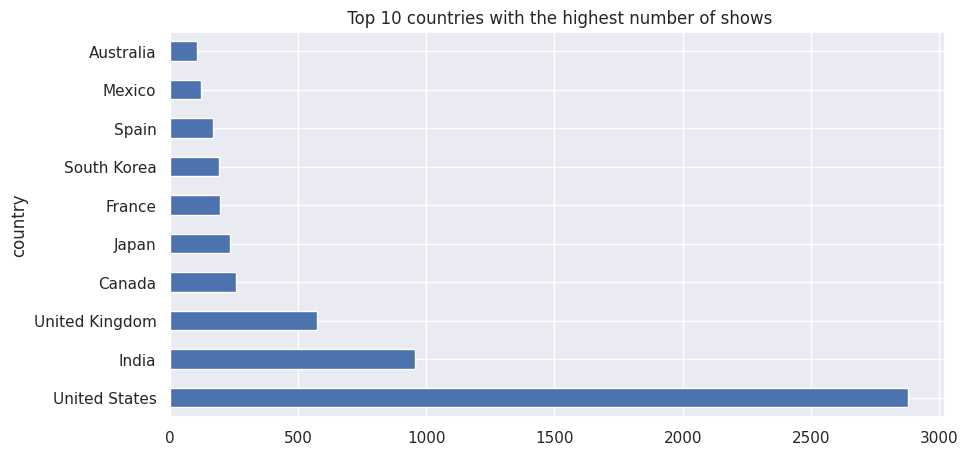

In [165]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

* **The highest number of movies / TV shows were based out of the US, followed by India and UK.**

In [166]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

np.float64(56.69281213835669)

In [167]:
# % share of movies / tv shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

np.float64(78.32068921177832)

* **The top 3 countries together account for about 56% of all movies and TV shows in the dataset.**
* **This value increases to about 78% for top ten countries.**

Text(0.5, 1.0, 'distribution by released year')

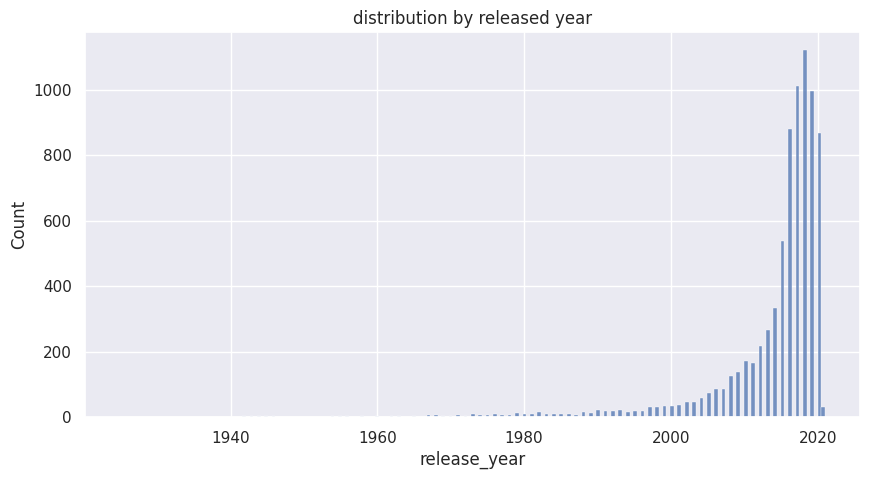

In [168]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

* **Netflix has greater number of new movies / TV shows than the old ones.**

Text(0.5, 1.0, 'Top 10 genres')

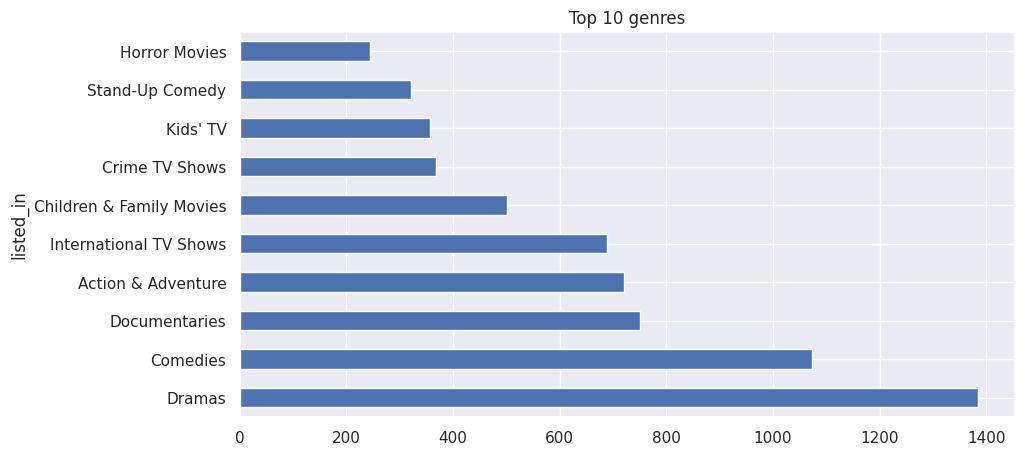

In [169]:
# Top 10 genres
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [170]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

np.float64(41.26269769834126)

In [171]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

np.float64(82.44824482448246)

* **The dramas is the most popular genre followed by comedies and documentaries.**
* **These three genres account for about 41% of all movies and TV shows.**
* **This value increases to about 82% for top 10 genres.**

Text(0.5, 0, '')

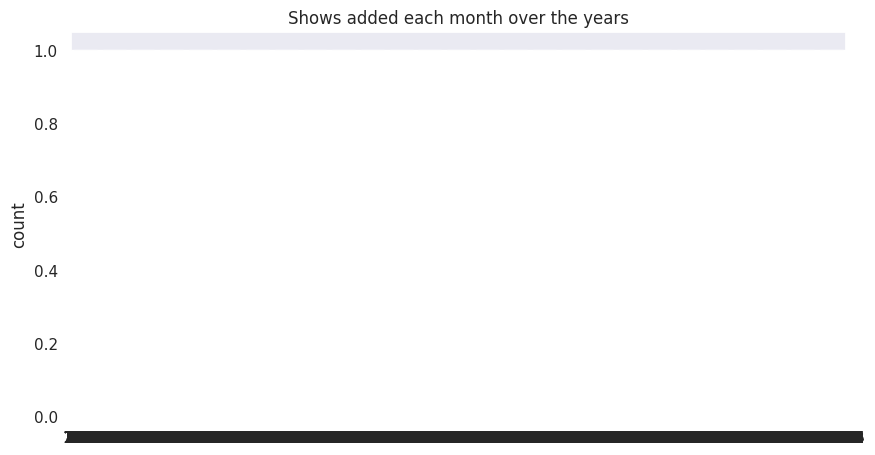

In [172]:
# Number of shows added on different months
plt.figure(figsize = (10,5))
sns.countplot(df['month_added'])
plt.title('Shows added each month over the years')
plt.xlabel('')

* **Over the years a greater number of shows were added in the months of October, November, December, and January.**

Text(0.5, 0, '')

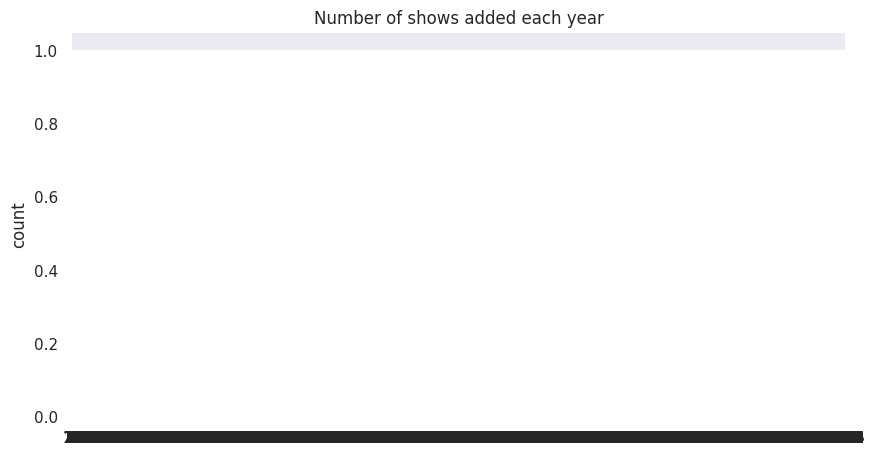

In [173]:
# Number of shows added over the years
plt.figure(figsize = (10,5))
sns.countplot(df['year_added'])
plt.title('Number of shows added each year')
plt.xlabel('')

* **Netflix continuous to add more shows on its platform over the years.**
* **There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.**
* **We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.**

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

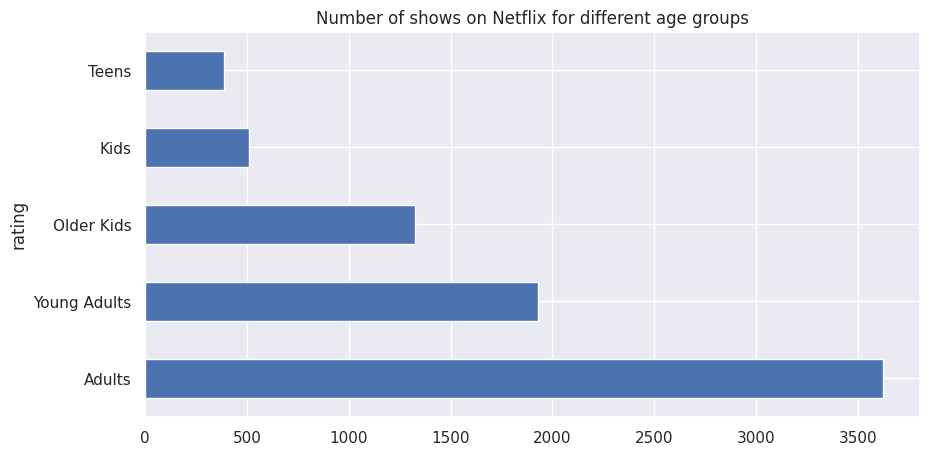

In [174]:
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
df.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

* **The majority of the shows on Netflix are catered to the needs of adult and young adult population.**

## **5.2. Bivariate analysis:**

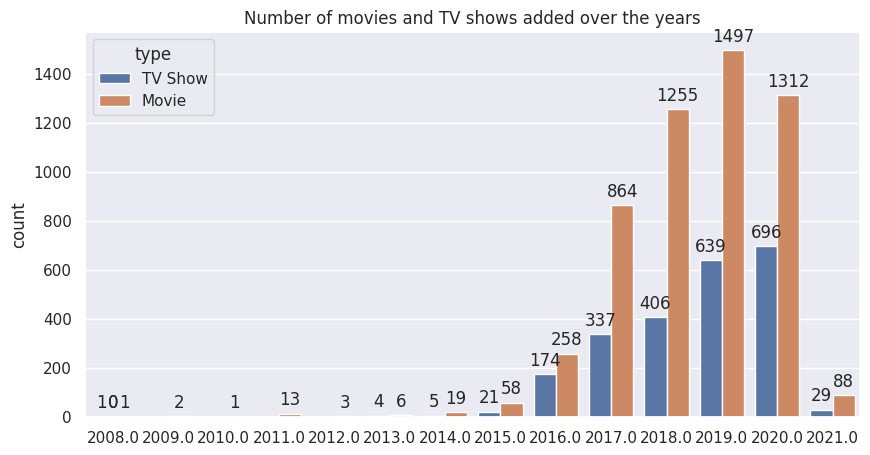

In [175]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

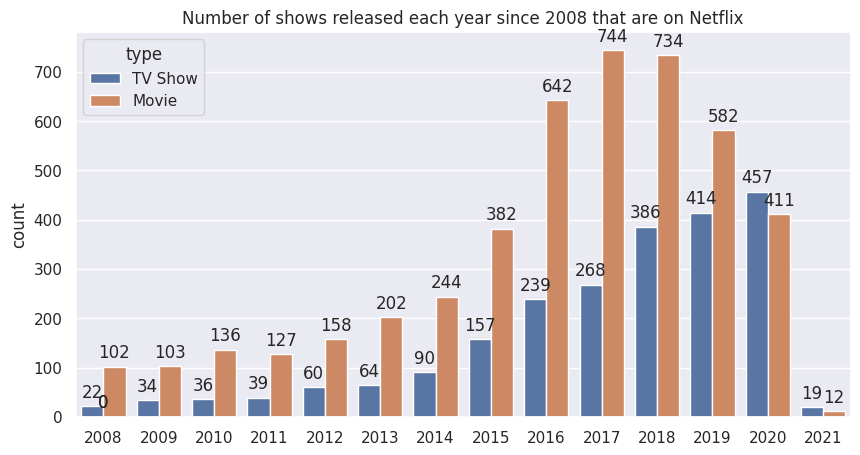

In [176]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* **Over the years, Netflix has consistently focused on adding more shows in its platform.**
* **Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.**
* **This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.**

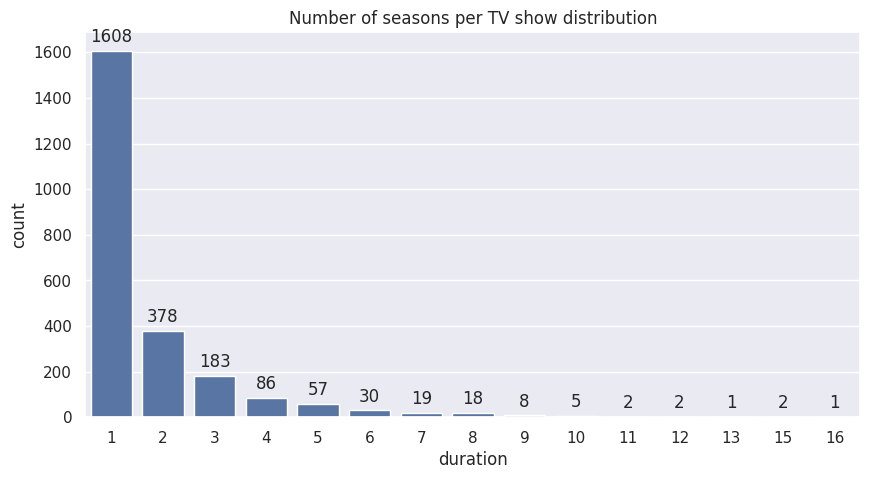

In [177]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [178]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)]) / len(df[df['type']=='TV Show'])* 100

67.0

* **The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.**
* **There are very few TV shows that have more than 8 seasons.**

Text(0.5, 1.0, 'Movie duration distribution')

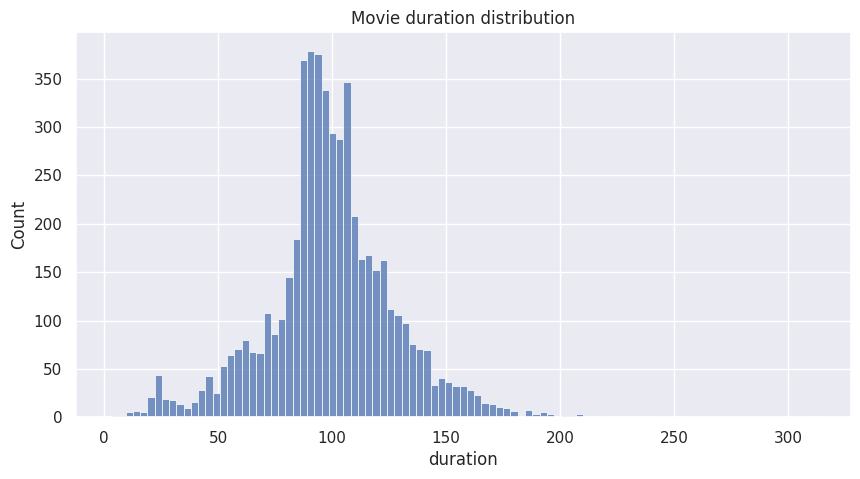

In [179]:
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [180]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

,duration
count,5377.000000
mean,99.307978
std,28.530881
min,3.000000
25%,86.000000
50%,98.000000
75%,114.000000
max,312.000000


* **The length of a movie may range from 3 min to 312 minutes, and the distribution is almost normally distributed.**

Text(0.5, 0, 'Year')

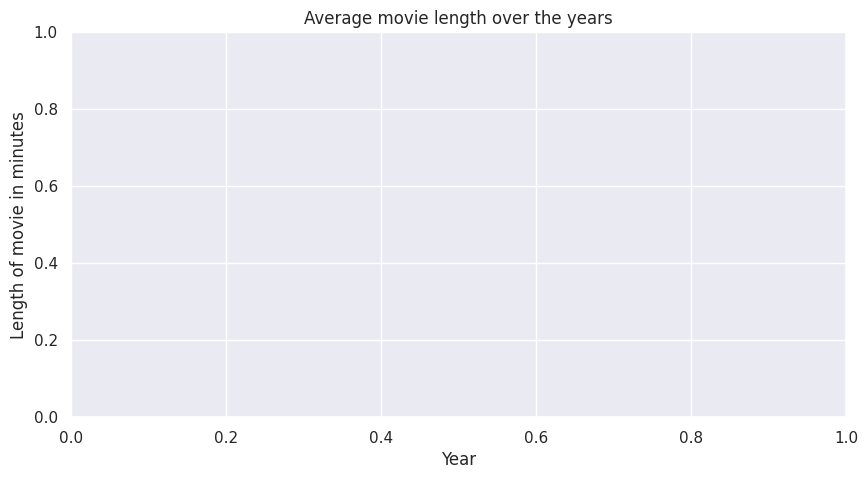

In [181]:
# Average movie length over the years
plt.figure(figsize=(10,5))
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

In [182]:
# Movie release year statistics
df[df['type']== 'Movie'].release_year.describe()

,release_year
count,5377.000000
mean,2012.920030
std,9.663282
min,1942.000000
25%,2012.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


* **Netflix has several movies on its site, including those that were released in way back 1942.**
* **As per the plot, movies made in the 1940s had a fairly short duration on average.**
* **On average, movies made in the 1960s have the longest movie length.**
* **The average length of a movie has been continuously decreasing since the 2000s.**

Text(0.5, 1.0, 'Top 10 genres for movies')

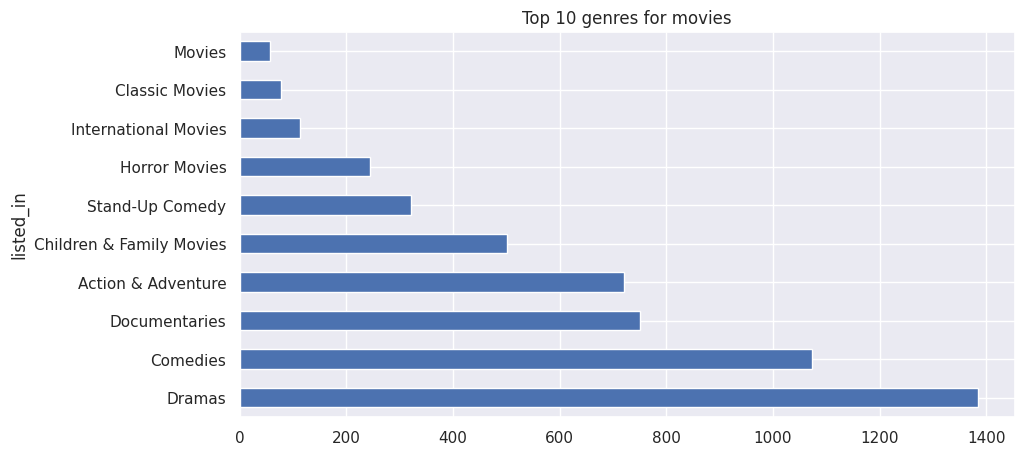

In [183]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

* **Dramas, comedies, and documentaries are the most popular genre for the movies on Netflix.**

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

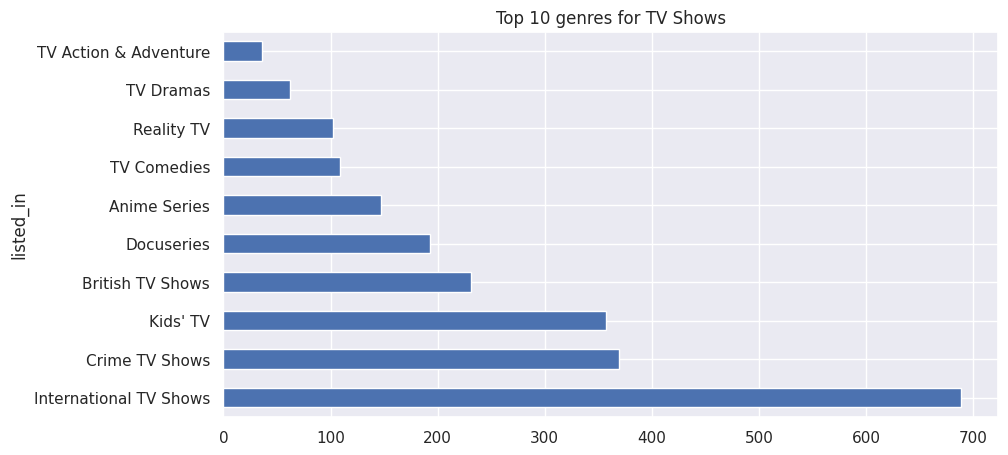

In [184]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

* **International, crime, and kids are the most popular genre for TV shows on Netflix.**

Text(0.5, 1.0, 'Top 10 movie directors')

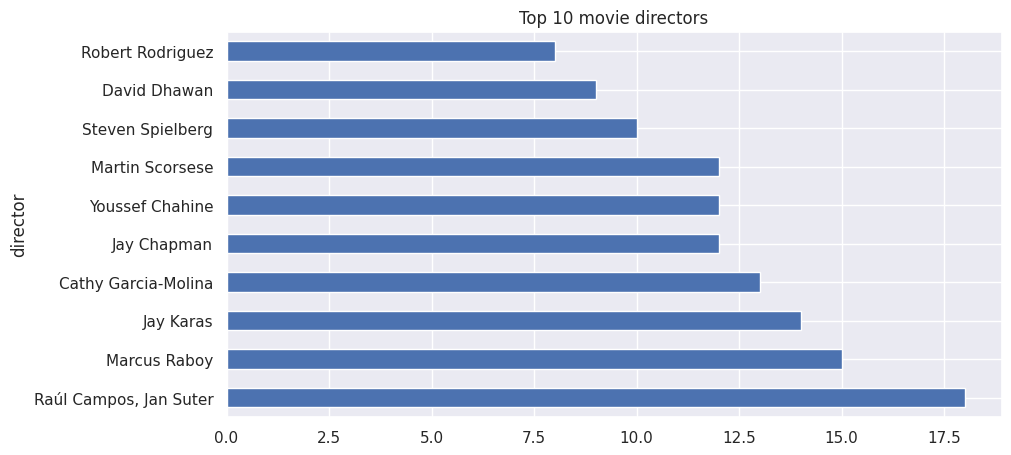

In [185]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

* **Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.**
* **This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina**

Text(0.5, 1.0, 'Top 10 TV show directors')

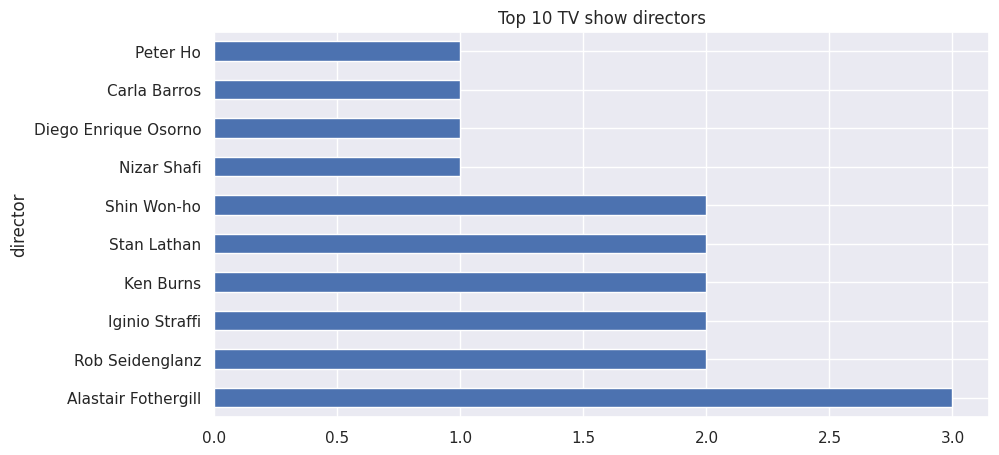

In [186]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

* **Alastair Fothergill has directed three TV shows, the most of any director.**
* **Only six directors have directed more than one television show.**

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

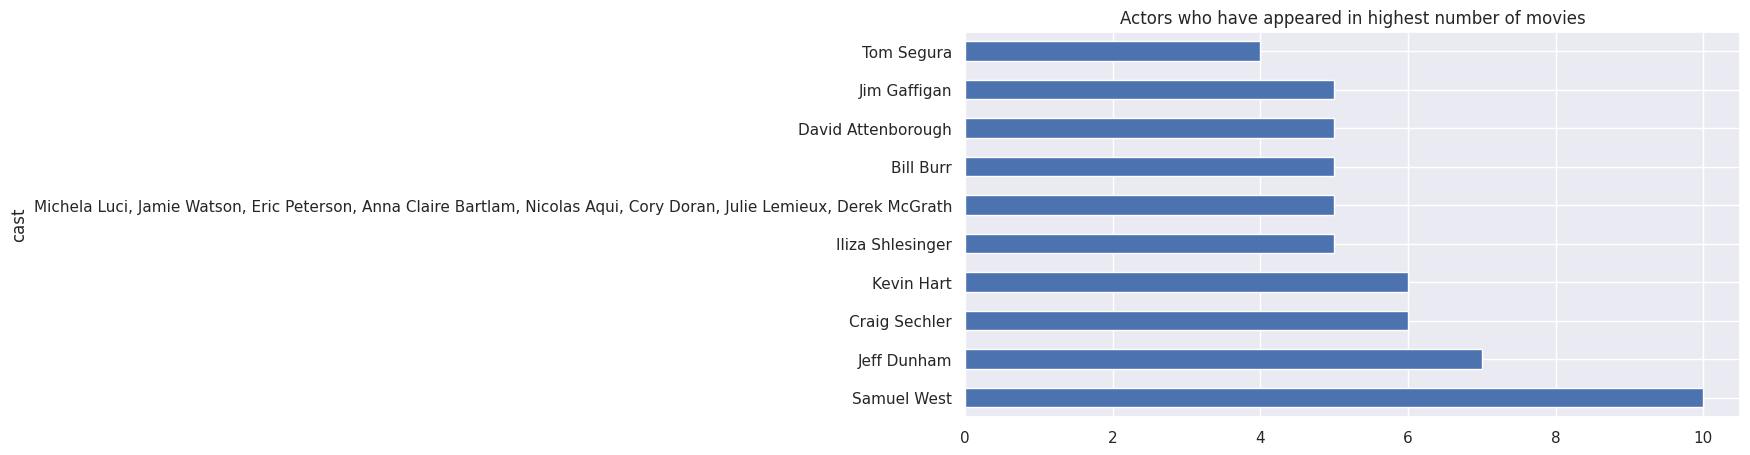

In [187]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

* **Samuel West has appeared in 10 movies, followed by Jeff Dunham with 7 movies.**

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

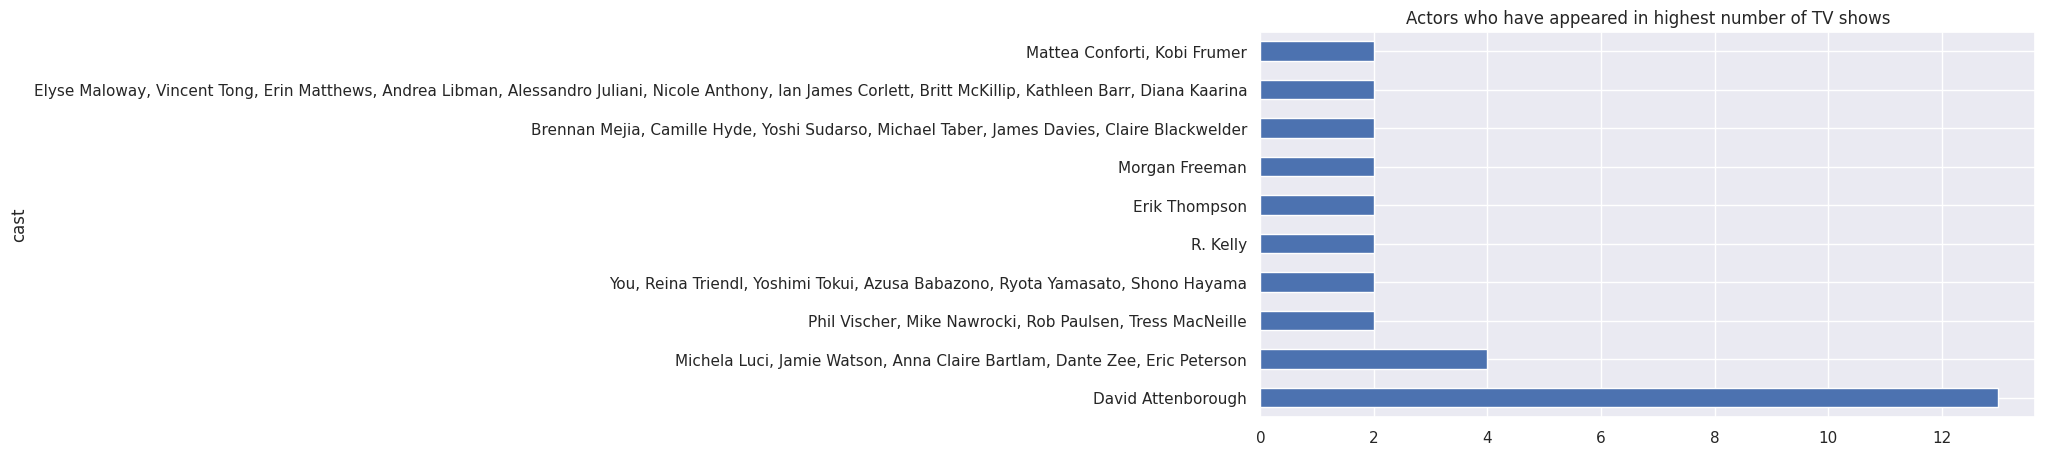

In [188]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

* **David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.**

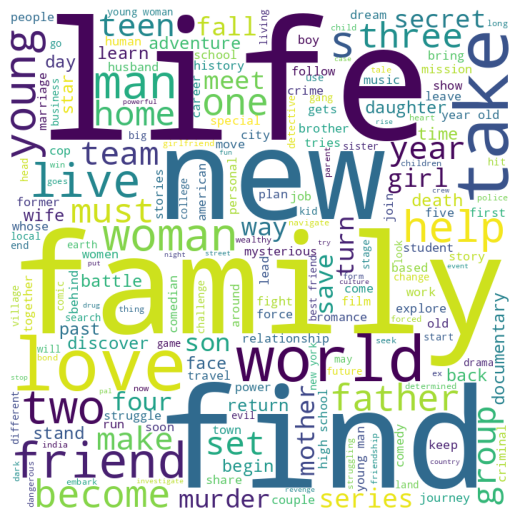

In [189]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

* **Some keywords in Netflix show descriptions: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.**

# **6. Data preprocessing:**

## **6.1. Modelling Approach:**
1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.
3. Lemmatization to generate a meaningful word out of corpus of words
4. Tokenization of corpus
5. Word vectorization
6. Dimensionality reduction
6. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

We will cluster the shows on Netflix based on the following attributes:
* Director
* Cast
* Country
* Listed in (genres)
* Description

In [190]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = df.copy()

In [191]:
df1.fillna('',inplace=True)

In [192]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' +
                                df1['cast'] +' ' +
                                df1['country'] +' ' +
                                df1['listed_in'] +' ' +
                                df1['description'])

In [193]:
df1['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

* **We have successfully added all the necessary data into a single column**

## **6.2. Removing non-ASCII characters:**

In [194]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [195]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [196]:
df1['clustering_attributes'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

* **We have successfully removed all non-ascii characters from the corpus.**

## **6.3. Remove stopwords and lower case:**

In [197]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers',
       'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd",
       'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it',
       "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll',
       'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn',
       "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not',
       'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'ot

In [198]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [199]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [200]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall.'

* **We have successfully removed all the stopwords and converted the corpus to lowercase.**

## **6.4. Remove punctuations**

In [201]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [202]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [203]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

* **We have successfully dropped all the punctuation marks from the corpus.**

## **6.5. Lemmatization:**

In [204]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [205]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [206]:
df1['clustering_attributes'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

* **We have lemmatized the corpus.**

## **6.6. Tokenization:**

In [207]:
tokenizer = TweetTokenizer()

In [208]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

* **The corpus is converted to tokens.**

## **6.7. Vectorization:**

* We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency.

\begin{align}
        TF = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document}
    \end{align}

\begin{align}
        IDF(t) = log_e(\frac{Total\  number \ of \ documents}{ Number\ of\ documents\ with\ term\ t\ in\ it })
    \end{align}

\begin{align}
TFIDF = {TF\ *\ IDF}
    \end{align}

In [209]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [210]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [211]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 222204 stored elements and shape (7777, 20000)>

In [212]:
# Shape of X
X.shape

(7777, 20000)

In [213]:
# data type of vector
type(X)

scipy.sparse._csr.csr_matrix

In [214]:
# convert X into array form for clustering
X = X.toarray()

## **6.8. Dimensionality reduction using PCA:**

* We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* We find that **100%** of the variance is explained by about **~7500 components**.
* Also, more than **80%** of the variance is explained just by **4000 components**.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [ ]:
# reducing the dimensions to a value less than or equal to the number of samples using pca
pca = PCA(n_components=0.8,random_state=42) # Keep 80% of the variance or specify a number less than 2717
pca.fit(X)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

We have successfully reduced the dimensionality of data using PCA.

# **7. Clusters implementation:**

## **7.1. K-Means Clustering:**

Building clusters using the K-means clustering algorithm.

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.**

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* **The highest Silhouette score is obtained for 6 clusters.**

Building 6 clusters using the k-means clustering algorithm:

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=33)
kmeans.fit(x_pca)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

In [ ]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Successfully built 6 clusters using the k-means clustering algorithm.**

### **7.1.1. Building wordclouds for different clusters built:**

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['kmeans_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: life, new, family, friend, save, help, discover, home, teen**

In [ ]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: life, love, family, father, young, girl, man, woman, friend, daughter**

In [ ]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2: young, world, girl, mysterious, humanity, life, student, school, battle, demon, force**

In [ ]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 3: love, life, family, romance, crime, murder, world, adventure**

In [ ]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 4: comedian, special, stand, comic, stage, sex, joke**

In [ ]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

**Keywords observed in cluster 5: documentary, world, life, filmmaker, american, life**

## **7.2. Hierarchical clustering:**

Building clusters using the agglomerative (hierarchical) clustering algorithm.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

**At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.**

Building 12 clusters using the Agglomerative clustering algorithm:

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, linkage='ward') # Removed affinity argument
hierarchical.fit_predict(x_pca)

In [ ]:
# Adding a kmeans cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Successfully built 12 clusters using the Agglomerative (hierarchical) clustering algorithm.

### **7.2.1. Building wordclouds for different clusters built:**

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['hierarchical_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

In [ ]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

**Keywords observed in cluster 0: life, new, find, family, save, friend, young, teen, adventure**

In [ ]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

**Keywords observed in cluster 1: love, family, life, student, romance, school, woman, master, father**

In [ ]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

**Keywords observed in cluster 2: life, new, series, crime, world, murder, history, detective**

In [ ]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

**Keywords observed in cluster 3: family, life, love, friend, teen, woman, man, young, world, wedding, secret**

In [ ]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

**Keywords observed in cluster 4: documentary, music, world, team, interview,history, family, career, battle, death**

In [ ]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

**Keywords observed in cluster 5: family, life, mexico, young, new, woman, man, secret, spain, death, singer**

In [ ]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

**Keywords observed in cluster 6: young, life, girl, world, friend, mysterious, demon, student, school, father**

In [ ]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

**Keywords observed in cluster 7: love, life, woman, new, student, family, korea, secret, detective, young**

In [ ]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

**Keywords observed in cluster 8: woman, man life, egypt, wealthy, money, young, love, revolution, struggling**

In [ ]:
# Wordcloud for cluster 9
hierarchical_worldcloud(9)

**Keywords observed in cluster 9: comedian, stand, life, comic, special, show, live, star, stage, hilarious, stories**

In [ ]:
# Wordcloud for cluster 10
hierarchical_worldcloud(10)

**Keywords observed in cluster 10: animal, nature, explore, planet, species, survive, natural, life, examine, earth**

In [ ]:
# Wordcloud for cluster 11
hierarchical_worldcloud(11)

**Keywords observed in cluster 11: love, man, woman, india, father, friend, girl, mumbai, city, learn, young**

# **8. Content based recommender system:**

* We can build a simple content based recommender system based on the similarity of the shows.
* If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
* To get the similarity score of the shows, we can use cosine similarity
* The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.

\begin{align}
        Cos(\theta) = \frac{A\ .\ B}{|A|\ .\ |B|}
    \end{align}

In [ ]:
# defining a new df for building a recommender system
recommender_df = df1.copy()

In [ ]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
cosine_similarity.shape

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

In [ ]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

In [ ]:
# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

In [ ]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

In [ ]:
# Recommendations for 'XXX'
recommend_10('XXX')

Invalid because the show 'XXX' is not available on Netflix.

# **9. Conclusions:**

* In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
* The dataset contained about 7787 records, and 11 attributes.
* We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).
* It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.
* It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
* Through TFIDF Vectorization, we created a total of 20000 attributes.
* We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.
* We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.
* Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.
* A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.